## EE219 Project 5: Popularity Prediction on Twitter

### Team members:
* **Yin Fei** 404284074

* **Yichen Wu** 504294181

* **Siyuan Chen** 405024391

* **Ruchen Zhen** 205036408

### Required Packages:
python 3.6  
numpy v1.14.0  
scikit-learn v0.19.1  
scipy v1.0.0  
matplotlib v2.1.2  
tabulate v0.8.2  

### Part 1: Popularity Prediction

#### Problem 1.1

In [125]:
import json, os, sys
import pickle

data_path = "./tweet_data"

filelist = []
tweetslist = []
retweetslist = []
numuserlist = []
followerslist = []
mindatalist = []
maxdatalist = []

if os.path.isfile("./tweet_features1a.pkl"):
    tweet_features1a = pickle.load(open("./tweet_features1a.pkl", "rb"))
    [filelist, tweetslist, retweetslist, numuserlist,\
     followerslist, mindatalist, maxdatalist, ] = tweet_features1a
else:
    for file_name in os.listdir(data_path):
        user = {}
        filelist.append(file_name)
        number_of_tweets = 0
        number_of_retweets = 0
        number_of_followers = 0
        min_data = sys.maxsize
        max_data = 0
        if file_name.endswith(".txt"):
            with open(os.path.join(data_path,file_name)) as text:
                print ("loaded " + file_name)
                for i, line in enumerate(text):
                    json_object = json.loads(line)
                    number_of_tweets += 1
                    username = json_object['author']['nick']
                    if username not in user:
                        number_of_followers += json_object['author']['followers']
                        user[username] = True
                    number_of_retweets += json_object['metrics']['citations']['total']
                    t = json_object['citation_date']
                    if t > max_data:
                        max_data = t
                    if t < min_data:
                        min_data = t
                tweetslist.append(number_of_tweets)
                retweetslist.append(number_of_retweets)
                numuserlist.append(len(user))
                followerslist.append(number_of_followers)
                mindatalist.append(min_data)
                maxdatalist.append(max_data)
    
    tweet_features1a = [filelist, tweetslist, retweetslist, numuserlist,\
                      followerslist, mindatalist, maxdatalist]
    pickle.dump(tweet_features1a, open("./tweet_features1a.pkl", "wb")) 
            

In [126]:
import numpy as np
taglist = [x[7:-4] for x in filelist]
followerslist = list(map(int, followerslist))
difftime = np.subtract(maxdatalist,mindatalist)

from tabulate import tabulate
print(tabulate(np.array([taglist, tweetslist, retweetslist, numuserlist, \
                         followerslist, difftime]).transpose(), \
         headers=['Tag','#tweets','#retweets', '#users', '#followers', 'duration(s)']))

Tag            #tweets    #retweets    #users    #followers    duration(s)
-----------  ---------  -----------  --------  ------------  -------------
#gohawks        188136       379022     77584     123199757        2081588
#gopatriots      26232        36727     18087      23413561        2066664
#nfl            259024       398517     75642     319346589        2112932
#patriots       489713       873068    327326     554816498        2112462
#sb49           826951      2076597    590636    1329185117        2096661
#superbowl     1348767      3221223    693087    2634415672        2108821


In [127]:
diffhour = difftime/3600

avgtweetsperhour = np.array(tweetslist) / np.array(diffhour)
avgfollowers = np.array(followerslist) / np.array(numuserlist)
avgnumofretweets = np.array(retweetslist) / np.array(tweetslist)

print(tabulate(np.array([taglist, avgtweetsperhour, avgfollowers, \
                         avgnumofretweets]).transpose(), \
         headers=['Tag','avg_tweets_per_hour','avg_followers', 'avg_#_of_retweets']))

Tag            avg_tweets_per_hour    avg_followers    avg_#_of_retweets
-----------  ---------------------  ---------------  -------------------
#gohawks                  325.372           1587.95              2.01462
#gopatriots                45.6945          1294.5               1.40008
#nfl                      441.323           4221.82              1.53853
#patriots                 834.556           1695                 1.78282
#sb49                    1419.89            2250.43              2.51115
#superbowl               2302.5             3800.99              2.38827


#### #Superbowl

In [128]:
superbowl_bar = {}

if os.path.isfile("./superbowl_bar.pkl"):
    superbowl_bar = pickle.load(open("./superbowl_bar.pkl", "rb"))
else:
    file_name='tweets_#superbowl.txt'
    with open(os.path.join(data_path, file_name)) as text:
        for i, line in enumerate(text):
            json_object = json.loads(line)
            t = int(json_object['citation_date']/3600)
            if t in superbowl_bar.keys():
                superbowl_bar[t] += 1
            else:
                superbowl_bar[t] = 1
    pickle.dump(superbowl_bar, open("./superbowl_bar.pkl", "wb")) 

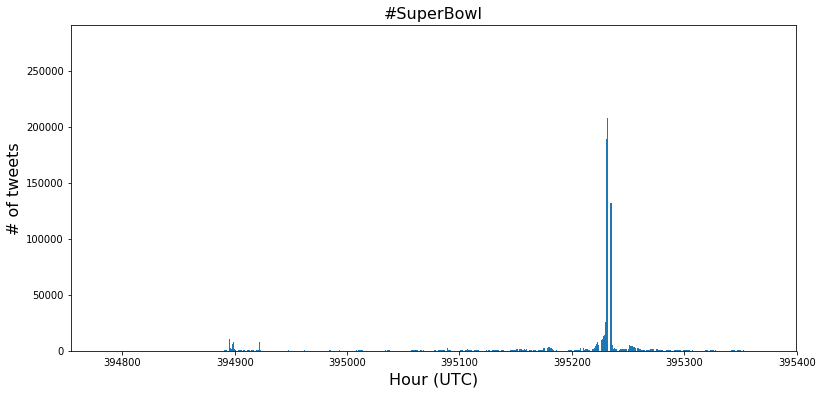

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 6))
plt.bar(superbowl_bar.keys(), superbowl_bar.values())
plt.xlabel('Hour (UTC)', fontsize=16)
plt.ylabel('# of tweets', fontsize=16)
plt.title('#SuperBowl', fontsize=16)
plt.show()

#### #NFL

In [130]:
nfl_bar = {}

if os.path.isfile("./nfl_bar.pkl"):
    nfl_bar = pickle.load(open("./nfl_bar.pkl", "rb"))
else:
    file_name='tweets_#nfl.txt'
    with open(os.path.join(data_path, file_name)) as text:
        for i, line in enumerate(text):
            json_object = json.loads(line)
            t = int(json_object['citation_date']/3600)
            if t in nfl_bar.keys():
                nfl_bar[t] += 1
            else:
                nfl_bar[t] = 1
    pickle.dump(nfl_bar, open("./nfl_bar.pkl", "wb")) 

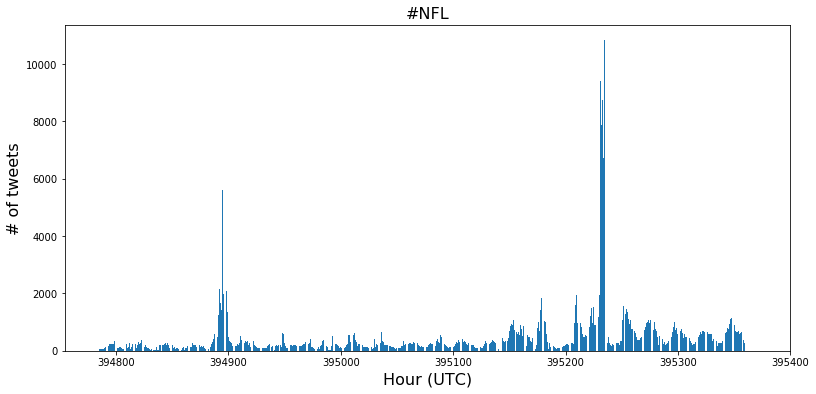

In [131]:
plt.figure(figsize=(13, 6))
plt.bar(nfl_bar.keys(), nfl_bar.values())
plt.xlabel('Hour (UTC)', fontsize=16)
plt.ylabel('# of tweets', fontsize=16)
plt.title('#NFL', fontsize=16)
plt.show()

#### problem 1.2

In [132]:
import datetime, time
import pytz
pst_tz = pytz.timezone('US/Pacific')

tweet_features1b = []

if os.path.isfile("./tweet_features1b.pkl"):
    tweet_features1b = pickle.load(open("./tweet_features1b.pkl", "rb"))
#    [ntweets, nretweets, sumfollowers, maxfollowers, hour] = tweet_features1b
else:
    # tag_hr: [ntweets, nretweets, sumfollowers, maxfollowers, hour]
    for idx, file_name in enumerate(filelist):
        min_hr = mindatalist[idx]//3600
        max_hr = maxdatalist[idx]//3600
        num_hr = max_hr - min_hr + 1
        tag_hr = np.zeros([num_hr, 5])
        
        time = datetime.datetime.fromtimestamp(mindatalist[idx], pst_tz)
        tag_hr[0][4] = time.hour
        for n in range(1, num_hr):
            tag_hr[n][4] = (tag_hr[n-1][4] + 1) % 24
            
        with open(os.path.join(data_path, file_name)) as text:
            print ("loaded " + file_name)

            for i, line in enumerate(text):
                json_object = json.loads(line)
                hr = int(json_object['citation_date']/3600) - min_hr
                tag_hr[hr][0] += 1
                tag_hr[hr][1] += json_object['metrics']['citations']['total']
                tag_hr[hr][2] += json_object['author']['followers']
                if json_object['author']['followers'] > tag_hr[hr][3]:
                    tag_hr[hr][3]=json_object['author']['followers']
    
        tweet_features1b.append(tag_hr)
    pickle.dump(tweet_features1b, open("./tweet_features1b.pkl", "wb")) 
            

In [133]:
import statsmodels.api as sm

N = 5 # N-hour window used as feature
for idx, tag in enumerate(taglist):
    X = tweet_features1b[idx][:-N, :]
    for i in range(1,N):
#        X = np.concatenate((X, tweet_features1b[idx][i:(-N+i), :]), axis=1)    # this code uses 5N features
        X[:, :3] = X[:, :3] + tweet_features1b[idx][i:(-N+i), :3]  # this combines 5N features to 5 features
        X[:, 3] = np.max([X[:, 3], tweet_features1b[idx][i:(-N+i), 3]] , axis=0)
        X[:, 4] = X[:, 4] + tweet_features1b[idx][i:(-N+i), 4]
    X[:, 4] = X[:, 4]/N
    
    y = tweet_features1b[idx][N:, 0]
    print("Linear Regression Model using %d-hr window for %s \n" % (N, tag), "-"*77)
    mod = sm.OLS(y,X)
    res = mod.fit()
    print(res.summary())
    print("\n"*4)

Linear Regression Model using 5-hr window for #gohawks 
 -----------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     125.9
Date:                Mon, 19 Mar 2018   Prob (F-statistic):           1.22e-89
Time:                        12:35:10   Log-Likelihood:                -6160.4
No. Observations:                 574   AIC:                         1.233e+04
Df Residuals:                     569   BIC:                         1.235e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

#### Problem 1.3

Features to use:
1. number of tweets
2. number of retweets
3. potential impression
4. ranking score
5. hour of the day

An Impression refers to the point in which a tweet is displayed once on a webpage. A tweet impression is counted when a tweet is delivered to the Twitter stream of any account and the user has read it but here’s a catch; not every Twitter user whose timeline has been delivered with the tweet reads it. Therefore, we consider this as total number of potential impressions. Potential impression is the total number of times tweets were delivered to the Twitter streams.

In [137]:
tweet_features1c = []

if os.path.isfile("./tweet_features1c.pkl"):
    tweet_features1c = pickle.load(open("./tweet_features1c.pkl", "rb"))
#    [ntweets, nretweets, sumfollowers, maxfollowers, hour] = tweet_features1b
else:
    # tag_hr: [ntweets, nretweets, sumfollowers, maxfollowers, hour]
    for idx, file_name in enumerate(filelist):
        min_hr = mindatalist[idx]//3600
        tag_hr = tweet_features1b[idx]
        tag_hr[:, 2:4] = np.zeros_like(tag_hr[:, 2:4])
            
        with open(os.path.join(data_path, file_name)) as text:
            print ("loaded " + file_name)

            for i, line in enumerate(text):
                json_object = json.loads(line)
                hr = int(json_object['citation_date']/3600) - min_hr
                tag_hr[hr][2] += json_object['metrics']['impressions']
                tag_hr[hr][3] += json_object['metrics']['ranking_score']
    
        tweet_features1c.append(tag_hr)
    pickle.dump(tweet_features1c, open("./tweet_features1c.pkl", "wb")) 

loaded tweets_#gohawks.txt
loaded tweets_#gopatriots.txt
loaded tweets_#nfl.txt
loaded tweets_#patriots.txt
loaded tweets_#sb49.txt
loaded tweets_#superbowl.txt


In [138]:
N2 = 5 # N-hour window used as feature
for idx, tag in enumerate(taglist):
    X = tweet_features1c[idx][:-N2, :]
    for i in range(1,N2):
#        X = np.concatenate((X, tweet_features1b[idx][i:(-N+i), :]), axis=1)    # this code uses 5N features
        X = X + tweet_features1c[idx][i:(-N2+i), :]  # this combines 5N features to 5 features
    
    y = tweet_features1c[idx][N:, 0]
    print("Linear Regression Model using %d-hr window\
        and custom features for %s \n" % (N2, tag), "-"*77)
    mod = sm.OLS(y,X)
    res = mod.fit()
    print(res.summary())
    print("\n"*4)

Linear Regression Model using 5-hr window        and custom features for #gohawks 
 -----------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     756.1
Date:                Mon, 19 Mar 2018   Prob (F-statistic):          1.46e-248
Time:                        13:51:37   Log-Likelihood:                -5790.5
No. Observations:                 574   AIC:                         1.159e+04
Df Residuals:                     569   BIC:                         1.161e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     

### Part 2

In [120]:
# superbowl, get the features and labels
import json, os
import pickle

file_name = 'tweets_#superbowl.txt'
data_path = "./tweet_data"

X = []
y = []
locationlist = []

if os.path.isfile("./part2.pkl"):
    part2 = pickle.load(open("./part2.pkl", "rb"))
    [X, y, locationlist] = part2
else:
    # extract X,y
    # y: WA set to 1, MA set to 0
    inlist_w=['washington','WA','Washington']
    notinlist_w=['DC','D.C.']
    inlist_m=['Massachusetts','massachusetts','MA']

    with open(os.path.join(data_path,file_name)) as text:
        for i, line in enumerate(text):
            json_object = json.loads(line)
            loc = json_object['tweet']['user']['location']
            if any([v1 in loc for v1 in inlist_w])\
            and all([v2 not in loc for v2 in notinlist_w]):
                X.append(json_object['tweet']['text'])
                y.append(1)
                locationlist.append(loc)
            if any(v1 in loc for v1 in inlist_m):
                X.append(json_object['tweet']['text'])
                y.append(0)
                locationlist.append(loc)
    part2 = [X, y, locationlist]
    pickle.dump(part2, open("./part2.pkl", "wb")) 

In [121]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation
import nltk
import re
# nltk.download('punkt')

from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer("english", ignore_stopwords=True)

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = "".join([ch for ch in text if ch not in punctuation])
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

def cleanup(data_set):
    for i in range(len(data_set)):
        temp = tokenize(data_set[i])
        data_set[i]=' '.join(temp)

In [122]:
cleanup(X)

vectorizer = CountVectorizer(min_df=5, stop_words='english') 
X_f=vectorizer.fit_transform(X)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_f)

from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=50, algorithm='arpack')
X_lsi = SVD.fit_transform(X_tfidf)

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
import itertools

def printusefulinfo(classifier, input_train, output_train,\
                    input_test, output_test, classes=["WA", "MA"] ):
    n = len(classes)
    classifier.fit(input_train,output_train) # train the classifier
    output_pred = classifier.predict(input_test) # make predictions
    output_pred_prob = classifier.predict_proba(input_test)
    
    # draw ROC
    fpr, tpr, threshold = roc_curve(output_test, output_pred_prob[:,1], pos_label=1)
    roc_auc = auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='lightsteelblue',
             lw=2, label='AUC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='deeppink', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # draw confusion matrix
    cmatrix = metrics.confusion_matrix(output_test, output_pred)
    plt.imshow(cmatrix, interpolation='nearest', cmap=plt.cm.BuGn)
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=25)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cmatrix.max() / 2.
    for i, j in itertools.product(range(n), range(n)):
        plt.text(j, i, format(cmatrix[i, j], fmt),
                horizontalalignment="center",
                color="white" if cmatrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    
    print("accuracy: ", accuracy_score(output_test, output_pred))
    print ('-------------------------------------------------------')
    print (metrics.classification_report(output_test, output_pred, target_names=classes),)

##### Try SVM

In [90]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lsi, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.model_selection import cross_val_score
svc = svm.SVC(kernel='linear')
knumber = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
'''
scores = []
for k in knumber:
    print (k)
    svc.C=k
    this_scores = cross_val_score(svc, X_lsi, y, n_jobs=-2)
    scores.append(np.mean(this_scores))
    
desiredknumber = knumber[np.argmax(scores)]
'''

In [91]:
desiredknumber = 0.1 # not to waste time recomputing it
classifier_desire = svm.SVC(kernel='linear', C=desiredknumber, probability = True)

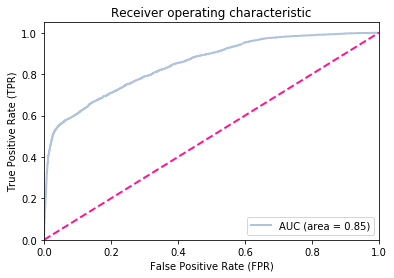

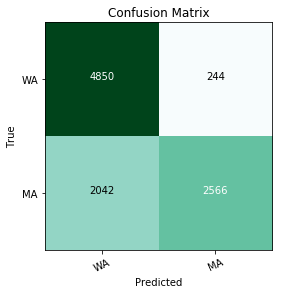

accuracy:  0.764378478664
-------------------------------------------------------
             precision    recall  f1-score   support

         WA       0.70      0.95      0.81      5094
         MA       0.91      0.56      0.69      4608

avg / total       0.80      0.76      0.75      9702



In [92]:
printusefulinfo(classifier_desire, X_train, y_train, X_test, y_test)

##### use naïve Bayes algorithm

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

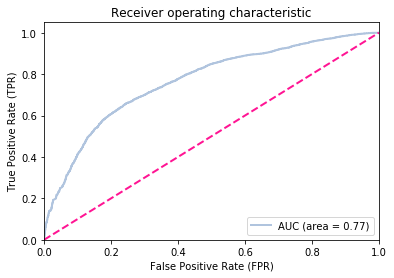

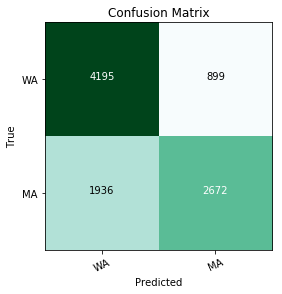

accuracy:  0.707792207792
-------------------------------------------------------
             precision    recall  f1-score   support

         WA       0.68      0.82      0.75      5094
         MA       0.75      0.58      0.65      4608

avg / total       0.71      0.71      0.70      9702



In [94]:
printusefulinfo(gnb, X_train, y_train, X_test, y_test)

##### use logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

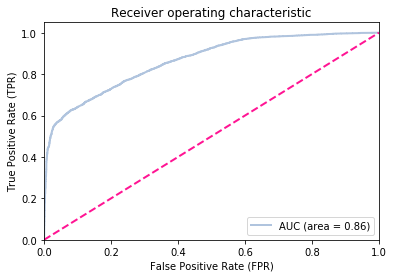

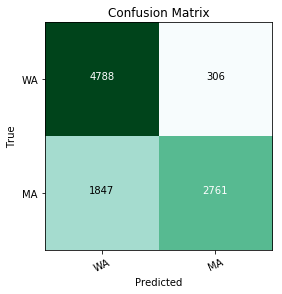

accuracy:  0.778086992373
-------------------------------------------------------
             precision    recall  f1-score   support

         WA       0.72      0.94      0.82      5094
         MA       0.90      0.60      0.72      4608

avg / total       0.81      0.78      0.77      9702



In [96]:
printusefulinfo(logreg, X_train, y_train, X_test, y_test)